# K-means Clustering 

En este ejercicio, implementará el algoritmo K-means y lo utilizará para la compresión de imágenes. 

* Empezarás con un conjunto de datos de muestra que te ayudará a intuir cómo funciona el algoritmo K-means. 
* Después, utilizarás el algoritmo K-means para la compresión de imágenes reduciendo el número de colores que aparecen en una imagen a sólo aquellos que son más comunes en esa imagen.

<details>
    <summary>Texto Original</summary>
  

# K-means Clustering 

In this exercise, you will implement the K-means algorithm and use it for image compression. 

* You will start with a sample dataset that will help you gain an intuition of how the K-means algorithm works. 
* After that, you will use the K-means algorithm for image compression by reducing the number of colors that occur in an image to only those that are most common in that image.

</details>


# Outline
- [ 1 - Implementing K-means](#1)
  - [ 1.1 Finding closest centroids](#1.1)
    - [ Exercise 1](#ex01)
  - [ 1.2 Computing centroid means](#1.2)
    - [ Exercise 2](#ex02)
- [ 2 - K-means on a sample dataset ](#2)
- [ 3 - Random initialization](#3)
- [ 4 - Image compression with K-means](#4)
  - [ 4.1 Dataset](#4.1)
  - [ 4.2 K-Means on image pixels](#4.2)
  - [ 4.3 Compress the image](#4.3)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

%matplotlib inline

<a name="1"></a>

## 1 - Implementación de K-means

El algoritmo K-means es un método para agrupar automáticamente puntos de datos
puntos de datos similares. 

* Concretamente, se da un conjunto de entrenamiento ${x^{(1)}, ..., x^{(m)}}$, y se desea
agrupar los datos en algunos "clusters" cohesivos. 


* K-means es un procedimiento iterativo que
     * Comienza adivinando los centroides iniciales, y luego 
     * Refina esta suposición mediante 
         * Asignando repetidamente los ejemplos a sus centros más cercanos, y luego 
         * Vuelve a calcular los centroides basándose en las asignaciones.

* En pseudocódigo, el algoritmo K-means es el siguiente:

<details>
    <summary>Texto Original</summary>

## 1 - Implementing K-means

The K-means algorithm is a method to automatically cluster similar
data points together. 

* Concretely, you are given a training set $\{x^{(1)}, ..., x^{(m)}\}$, and you want
to group the data into a few cohesive “clusters”. 


* K-means is an iterative procedure that
     * Starts by guessing the initial centroids, and then 
     * Refines this guess by 
         * Repeatedly assigning examples to their closest centroids, and then 
         * Recomputing the centroids based on the assignments.
         

* In pseudocode, the K-means algorithm is as follows:

    
</details>

    ``` python
    # Initialize centroids
    # K is the number of clusters
    centroids = kMeans_init_centroids(X, K)
    
    for iter in range(iterations):
        # Cluster assignment step: 
        # Assign each data point to the closest centroid. 
        # idx[i] corresponds to the index of the centroid 
        # assigned to example i
        idx = find_closest_centroids(X, centroids)

        # Move centroid step: 
        # Compute means based on centroid assignments
        centroids = compute_centroids(X, idx, K)
    ```
* El bucle interno del algoritmo realiza repetidamente dos pasos:
    1. Asignar cada ejemplo de entrenamiento $x^{(i)}$ a su centroide más cercano, y
    2. Recalcular la media de cada centroide utilizando los puntos asignados a él. 
    
    
* El algoritmo $K$-means siempre converge a un conjunto final de medias para los centroides. 

* Sin embargo, la solución convergente no siempre es ideal y depende de la configuración inicial de los centroides.
    * Por lo tanto, en la práctica el algoritmo K-means suele ejecutarse varias veces con diferentes inicializaciones aleatorias. 
    * Una forma de elegir entre estas diferentes soluciones de diferentes inicializaciones aleatorias es elegir la que tenga el menor valor de la función de coste (distorsión).

Se implementarán las dos fases del algoritmo K-means por separado
en las siguientes secciones. 
* Empezarás completando `encontrar_el_centroide_más_cercano` y luego procederás a completar `computar_centroides`.


<details>
    <summary>Texto Original</summary>

* The inner-loop of the algorithm repeatedly carries out two steps:
    1. Assigning each training example $x^{(i)}$ to its closest centroid, and
    2. Recomputing the mean of each centroid using the points assigned to it. 
    
    
* The $K$-means algorithm will always converge to some final set of means for the centroids. 

* However, the converged solution may not always be ideal and depends on the initial setting of the centroids.
    * Therefore, in practice the K-means algorithm is usually run a few times with different random initializations. 
    * One way to choose between these different solutions from different random initializations is to choose the one with the lowest cost function value (distortion).

You will implement the two phases of the K-means algorithm separately
in the next sections. 
* You will start by completing `find_closest_centroid` and then proceed to complete `compute_centroids`.

<a name="1.1"></a>
### 1.1 Encontrar los centroides más cercanos

En la fase de "asignación de clusters" del algoritmo K-means, el
algoritmo asigna cada ejemplo de entrenamiento $x^{(i)}$ a su centroide
centroid, dadas las posiciones actuales de los centroides. 

<a name="ex01"></a>
### Exercise 1

Tu tarea es completar el código de `find_closest_centroids`. 
* Esta función toma la matriz de datos `X` y las ubicaciones de todos los
centroids dentro de `centroids` 
* Debe dar salida a una matriz unidimensional `idx` (que tiene el mismo número de elementos que `X`) que contiene el índice del centroide más cercano (un valor en $\{1,...,K\}$, donde $K$ es el número total de centroides) a cada ejemplo de entrenamiento .
* En concreto, para cada ejemplo $x^{(i)}$ establecemos
$$c^{(i)} := j \quad \mathrm{que \; miniminiza} \quad ||x^{(i)} - \mu_j||^2,$$
donde 
* $c^{(i)}$ es el índice del centroide más cercano a $x^{(i)}$ (corresponde a `idx[i]` en el código de inicio), y 
* $\mu_j$ es la posición (valor) del centroide $j$. ( almacenado en `centroides` en el código de inicio)
 
Si te quedas atascado, puedes consultar las pistas presentadas después de la celda de abajo para ayudarte con la implementación.

<details>
    <summary>Texto Original</summary>

### 1.1 Finding closest centroids

In the “cluster assignment” phase of the K-means algorithm, the
algorithm assigns every training example $x^{(i)}$ to its closest
centroid, given the current positions of centroids. 

<a name="ex01"></a>
### Exercise 1

Your task is to complete the code in `find_closest_centroids`. 
* This function takes the data matrix `X` and the locations of all
centroids inside `centroids` 
* It should output a one-dimensional array `idx` (which has the same number of elements as `X`) that holds the index  of the closest centroid (a value in $\{1,...,K\}$, where $K$ is total number of centroids) to every training example .
* Specifically, for every example $x^{(i)}$ we set
$$c^{(i)} := j \quad \mathrm{that \; minimizes} \quad ||x^{(i)} - \mu_j||^2,$$
where 
 * $c^{(i)}$ is the index of the centroid that is closest to $x^{(i)}$ (corresponds to `idx[i]` in the starter code), and 
 * $\mu_j$ is the position (value) of the $j$’th centroid. (stored in `centroids` in the starter code)
 
If you get stuck, you can check out the hints presented after the cell below to help you with the implementation.

In [5]:
# UNQ_C1
# GRADED FUNCTION: find_closest_centroids

def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    Calcula el centroide de cada ejemplo
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): k centroids
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """

    # Set K seleccionamos los K
    K = centroids.shape[0]

    # You need to return the following variables correctly
    idx = np.zeros(X.shape[0], dtype=int)

    ### START CODE HERE ###
    # for ejemplo in range(X.shape[0]):
    #    distancia = []
    #    for centro in range(K):
    #        distancia_entre_ejemplo_y_cento = np.linalg.norm(X[ejemplo] - centroids[centro])
    #        distancia.append(distancia_entre_ejemplo_y_cento)
    #    idx[ejemplo] = np.argmin(distancia) 
    
    
    # codigo con lista por comprension
    for ej in range(X.shape[0]):
        idx[ej] = np.argmin( [np.linalg.norm(X[ej] - centroids[centro]) for centro in range(K) ]) 
    
    ### END CODE HERE ###
    
    return idx

<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
    
* Here's how you can structure the overall implementation for this function
    ```python 
    def find_closest_centroids(X, centroids):
    
        # Set K
        K = centroids.shape[0]
    
        # You need to return the following variables correctly
        idx = np.zeros(X.shape[0], dtype=int)
    
        ### START CODE HERE ###
        for i in range(X.shape[0]):
            # Array to hold distance between X[i] and each centroids[j]
            distance = [] 
            for j in range(centroids.shape[0]):
                norm_ij = # Your code to calculate the norm between (X[i] - centroids[j])
                distance.append(norm_ij)
            
            idx[i] = # Your code here to calculate index of minimum value in distance
        ### END CODE HERE ###
        return idx
    ```
  
    If you're still stuck, you can check the hints presented below to figure out how to calculate `norm_ij` and `idx[i]`.
    
    <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate norm_ij</b></font></summary>
           &emsp; &emsp; You can use <a href="https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html">np.linalg.norm</a> to calculate the norm 
          <details>
              <summary><font size="2" color="blue"><b>&emsp; &emsp; More hints to calculate norm_ij</b></font></summary>
               &emsp; &emsp; You can compute norm_ij as <code>norm_ij = np.linalg.norm(X[i] - centroids[j]) </code>
           </details>
    </details>

     <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate idx[i]</b></font></summary>
          &emsp; &emsp; You can use <a href="https://numpy.org/doc/stable/reference/generated/numpy.argmin.html">np.argmin</a> to find the index of the minimum value
          <details>
              <summary><font size="2" color="blue"><b>&emsp; &emsp; More hints to calculate idx[i]</b></font></summary>
              &emsp; &emsp; You can compute idx[i] as <code>idx[i] = np.argmin(distance)</code>
          </details>
    </details>
        
    </details>

</details>

    


Ahora vamos a comprobar su implementación utilizando un conjunto de datos de ejemplo

<details>
    <summary>Texto Original</summary>

Now let's check your implementation using an example dataset

In [6]:
# Load an example dataset that we will be using
# Cargar un conjunto de datos de ejemplo que vamos a utilizar
X = load_data()

El código siguiente imprime los cinco primeros elementos de la variable `X` y las dimensiones de la variable

<details>
    <summary>Texto Original</summary>

The code below prints the first five elements in the variable `X` and the dimensions of the variable

In [7]:
print("First five elements of X are:\n", X[:5])
print('The shape of X is:', X.shape)

First five elements of X are:
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
The shape of X is: (300, 2)


In [8]:
# Select an initial set of centroids (3 Centroids)
# Seleccionar un conjunto inicial de centroides (3 Centroides)
initial_centroids = np.array([[3,3], [6,2], [8,5]])

# Find closest centroids using initial_centroids
# Encontrar los centroides más cercanos utilizando initial_centroids
idx = find_closest_centroids(X, initial_centroids)

# Print closest centroids for the first three elements
# Imprime los centros más cercanos para los tres primeros elementos
print("First three elements in idx are:", idx[:3])

# UNIT TEST
from public_tests import *

find_closest_centroids_test(find_closest_centroids)


First three elements in idx are: [0 2 1]
All tests passed!


**Expected Output**:
<table>
<tr>
<td> <b>First three elements in idx are<b></td>
<td> [0 2 1] </td> 
</tr>
</table>

<a name="1.2"></a>
### 1.2 Cálculo de las medias de los centroides

Dadas las asignaciones de cada punto a un centroide, la segunda fase del
algoritmo vuelve a calcular, para cada centroide, la media de los puntos que
que le fueron asignados.

### Ejercicio 2

Por favor, complete el `compute_centroids` a continuación para volver a calcular el valor de cada centroide

* Específicamente, para cada centroide $\mu_k$ establecemos
$$\mu_k = \frac{1}{|C_k|} \sum_{i \in C_k} x^{(i)}$$ 

    donde 
    * $C_k$ es el conjunto de ejemplos que se asignan al centroide $k$
    * $|C_k|$ es el número de ejemplos en el conjunto $C_k$

* Concretamente, si dos ejemplos digamos $x^{(3)}$ y $x^{(5)}$ se asignan al centroide $k=2$,
entonces debe actualizar $\mu_2 = \frac{1}{2}(x^{(3)}+x^{(5)})$.

Si te quedas atascado, puedes consultar las pistas presentadas después de la celda de abajo para ayudarte con la implementación.

<details>
    <summary>Texto Original</summary>

### 1.2 Computing centroid means

Given assignments of every point to a centroid, the second phase of the
algorithm recomputes, for each centroid, the mean of the points that
were assigned to it.


<a name="ex02"></a>
### Exercise 2

Please complete the `compute_centroids` below to recompute the value for each centroid

* Specifically, for every centroid $\mu_k$ we set
$$\mu_k = \frac{1}{|C_k|} \sum_{i \in C_k} x^{(i)}$$ 

    where 
    * $C_k$ is the set of examples that are assigned to centroid $k$
    * $|C_k|$ is the number of examples in the set $C_k$


* Concretely, if two examples say $x^{(3)}$ and $x^{(5)}$ are assigned to centroid $k=2$,
then you should update $\mu_2 = \frac{1}{2}(x^{(3)}+x^{(5)})$.

If you get stuck, you can check out the hints presented after the cell below to help you with the implementation.

In [10]:
# UNQ_C2
# GRADED FUNCTION: compute_centpods

def compute_centroids(X, idx, K):
    """
    Devuelve los nuevos centroides calculando las medias de los 
    puntos de datos asignados a cada centroide.
    
    Args:
        X (ndarray):   (m, n) Puntos de datos
        idx (ndarray): (m,) Matriz que contiene el índice del centroide más cercano para cada 
                       ejemplo en X. Concretamente, idx[i] contiene el índice del 
                       el centroide más cercano al ejemplo i
        K (int): número de centroides
    
    Devuelve:
        centroides (ndarray): (K, n) Nuevos centroides calculados
    """
    
    # Useful variables
    m, n = X.shape
    
    # Es necesario devolver correctamente las siguientes variables
    centroids = np.zeros((K, n))
    
    ### START CODE HERE ###
    for centro in range(K):   
        points =  X [idx == centro]  
        centroids[centro] = np.mean(points, axis = 0)

    ### END CODE HERE ## 
    
    return centroids

<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
    
* Here's how you can structure the overall implementation for this function
    ```python 
    def compute_centroids(X, idx, K):
        # Useful variables
        m, n = X.shape
    
        # You need to return the following variables correctly
        centroids = np.zeros((K, n))
    
        ### START CODE HERE ###
        for k in range(K):   
            points = # Your code here to get a list of all data points in X assigned to centroid k  
            centroids[k] = # Your code here to compute the mean of the points assigned
    ### END CODE HERE ## 
    
    return centroids
    ```
  
    If you're still stuck, you can check the hints presented below to figure out how to calculate `points` and `centroids[k]`.
    
    <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate points</b></font></summary>
           &emsp; &emsp; Say we wanted to find all the values in X that were assigned to cluster <code>k=0</code>. That is, the corresponding value in idx for these examples is 0. In Python, we can do it as <code>X[idx == 0]</code>. Similarly, the points assigned to centroid <code>k=1</code> are <code>X[idx == 1]</code>
          <details>
              <summary><font size="2" color="blue"><b>&emsp; &emsp; More hints to calculate points</b></font></summary>
               &emsp; &emsp; You can compute points as <code>points = X[idx == k] </code>
           </details>
    </details>

     <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate centroids[k]</b></font></summary>
          &emsp; &emsp; You can use <a href="https://numpy.org/doc/stable/reference/generated/numpy.mean.html">np.mean</a> to find the mean. Make sure to set the parameter <code>axis=0</code> 
          <details>
              <summary><font size="2" color="blue"><b>&emsp; &emsp; More hints to calculate centroids[k]</b></font></summary>
              &emsp; &emsp; You can compute centroids[k] as <code>centroids[k] = np.mean(points, axis = 0)</code>
          </details>
    </details>
        
    </details>

</details>

    


Now check your implementation by running the cell below  

Ahora comprueba tu implementación ejecutando la celda siguiente

In [11]:
K = 3
centroids = compute_centroids(X, idx, K)

print("The centroids are:", centroids)

# UNIT TEST
compute_centroids_test(compute_centroids)


The centroids are: [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]
All tests passed!


**Expected Output**:

2.42830111 3.15792418

5.81350331 2.63365645

7.11938687 3.6166844 

<a name="2"></a>

## 3 - K-means en un conjunto de datos de muestra 

Una vez que hayas completado las dos funciones (`find_closest_centroids`
y `compute_centroids`), el siguiente paso es ejecutar el 
algoritmo K-means en un conjunto de datos 2D de juguete para ayudarle a entender cómo
K-means funciona. 
* Te animamos a que eches un vistazo a la función (`run_kMeans`) de abajo para entender cómo funciona. 
* Observe que el código llama a las dos funciones que ha implementado en un bucle.

Cuando se ejecuta el código de abajo, se producirá una
visualización que recorre el progreso del algoritmo en cada
cada iteración. 
* Al final, tu figura debería parecerse a la que se muestra en la Figura 1.

<img src="images/figure 1.png" width="500" height="500">

**Nota: No es necesario implementar nada para esta parte. Simplemente ejecute el código proporcionado a continuación


<details>
    <summary>Texto Original</summary>



## 2 - K-means on a sample dataset 

After you have completed the two functions (`find_closest_centroids`
and `compute_centroids`) above, the next step is to run the
K-means algorithm on a toy 2D dataset to help you understand how
K-means works. 
* We encourage you to take a look at the function (`run_kMeans`) below to understand how it works. 
* Notice that the code calls the two functions you implemented in a loop.

When you run the code below, it will produce a
visualization that steps through the progress of the algorithm at
each iteration. 
* At the end, your figure should look like the one displayed in Figure 1.

<img src="images/figure 1.png" width="500" height="500">


**Note**: You do not need to implement anything for this part. Simply run the code provided below

In [12]:
# You do not need to implement anything for this part

def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Ejecuta el algoritmo K-Means en la matriz de datos X, donde cada fila de X
    es un solo ejemplo
    """
    
    # Initialize values
    m, n               = X.shape 
    K                  = initial_centroids.shape[0]
    centroids          = initial_centroids
    previous_centroids = centroids    
    idx                = np.zeros(m)
    
    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration {} / {}".format(i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

K-Means iteration 0 / 9
K-Means iteration 1 / 9
K-Means iteration 2 / 9
K-Means iteration 3 / 9
K-Means iteration 4 / 9
K-Means iteration 5 / 9
K-Means iteration 6 / 9
K-Means iteration 7 / 9
K-Means iteration 8 / 9
K-Means iteration 9 / 9


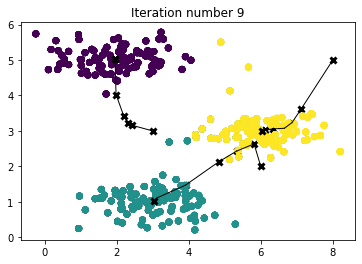

In [15]:
# Load an example dataset
X = load_data()

# Set initial centroids
initial_centroids = np.array([[3,3],[6,2],[8,5]])
K = 3

# Number of iterations
max_iters = 10

centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

<a name="3"></a>
## 3 - Inicialización aleatoria

La asignación inicial de los centroides para el conjunto de datos de ejemplo se diseñó de forma que se viera la misma figura que en la Figura 1. En la práctica, una buena estrategia para inicializar los centroides es seleccionar ejemplos aleatorios del
conjunto de entrenamiento.

En esta parte del ejercicio, debes entender cómo se implementa la función `kMeans_init_centroids`.
* El código primero baraja aleatoriamente los índices de los ejemplos (usando `np.random.permutation()`). 
* Luego, selecciona los primeros $K$ ejemplos basados en la permutación aleatoria de los índices. 
    * Esto permite que los ejemplos sean seleccionados al azar sin el riesgo de seleccionar el mismo ejemplo dos veces.

**Nota**: No necesitas implementar nada para esta parte del ejercicio.

<details><summary>Texto Original</summary>
    
## 3 - Random initialization

The initial assignments of centroids for the example dataset was designed so that you will see the same figure as in Figure 1. In practice, a good strategy for initializing the centroids is to select random examples from the
training set.

In this part of the exercise, you should understand how the function `kMeans_init_centroids` is implemented.
* The code first randomly shuffles the indices of the examples (using `np.random.permutation()`). 
* Then, it selects the first $K$ examples based on the random permutation of the indices. 
    * This allows the examples to be selected at random without the risk of selecting the same example twice.

**Note**: You do not need to implement anything for this part of the exercise.

In [16]:
# You do not need to modify this part

def kMeans_init_centroids(X, K):
    """
    Esta función inicializa los K centroides que se van a 
    utilizar en K-Means en el conjunto de datos X
    
    Args:
        X (ndarray): Puntos de datos 
        K (int): número de centroides/clusters
    
    Devuelve:
        centroides (ndarray): Centroides inicializados
    """
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

<a name="4"></a>
## 4 - 4 - Compresión de imágenes con K-means

En este ejercicio, se aplicará K-means a la compresión de imágenes. 

* En una representación directa de color de 24 bits de una imagen$^{2}$, cada píxel se representa como tres enteros sin signo de 8 bits (que van de 0 a 255) que especifican los valores de intensidad del rojo, el verde y el azul. Esta codificación suele denominarse codificación RGB.
* Nuestra imagen contiene miles de colores, y en esta parte del ejercicio, usted reducirá el número de
colores a 16 colores.
* Al hacer esta reducción, es posible representar (comprimir) la foto de una manera eficiente. 
* Específicamente, sólo necesita almacenar los valores RGB de los 16 colores seleccionados, y para cada píxel de la imagen ahora sólo necesita almacenar el índice del color en esa ubicación (donde sólo son necesarios 4 bits para representar 16 posibilidades).

En esta parte, utilizarás el algoritmo K-means para seleccionar los 16 colores que se utilizarán para representar la imagen comprimida.
* Concretamente, tratará cada píxel de la imagen original como un ejemplo de datos y utilizará el algoritmo K-means para encontrar los 16 colores que mejor agrupan (cluster) los píxeles en el espacio RGB tridimensional. 
* Una vez calculados los centros de los clusters en la imagen, se utilizarán los 16 colores para reemplazar los píxeles de la imagen original.

<details><summary>Texto Original</summary>

## 4 - Image compression with K-means

In this exercise, you will apply K-means to image compression. 

* In a straightforward 24-bit color representation of an image$^{2}$, each pixel is represented as three 8-bit unsigned integers (ranging from 0 to 255) that specify the red, green and blue intensity values. This encoding is often refered to as the RGB encoding.
* Our image contains thousands of colors, and in this part of the exercise, you will reduce the number of
colors to 16 colors.
* By making this reduction, it is possible to represent (compress) the photo in an efficient way. 
* Specifically, you only need to store the RGB values of the 16 selected colors, and for each pixel in the image you now need to only store the index of the color at that location (where only 4 bits are necessary to represent 16 possibilities).

In this part, you will use the K-means algorithm to select the 16 colors that will be used to represent the compressed image.
* Concretely, you will treat every pixel in the original image as a data example and use the K-means algorithm to find the 16 colors that best group (cluster) the pixels in the 3- dimensional RGB space. 
* Once you have computed the cluster centroids on the image, you will then use the 16 colors to replace the pixels in the original image.

<img src="images/figure 2.png" width="500" height="500">

$^{2}$<sub>The provided photo used in this exercise belongs to Frank Wouters and is used with his permission.</sub>

<a name="4.1"></a>
### 4.1 Dataset

**Load image**

First, you will use `matplotlib` to read in the original image, as shown below.

In [17]:
# Load an image of a bird
original_img = plt.imread('bird_small.png')

**Visualize image**

You can visualize the image that was just loaded using the code below.

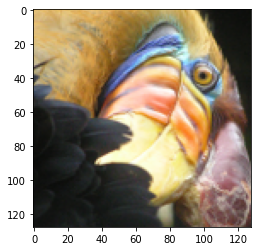

In [18]:
# Visualizing the image
plt.imshow(original_img)

**Comprobar la dimensión de la variable**

Como siempre, imprimirás la forma de tu variable para familiarizarte con los datos.

In [19]:
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (128, 128, 3)


Como puedes ver, esto crea una matriz tridimensional `original_img` donde 
* los dos primeros índices identifican una posición de píxel, y
* el tercer índice representa el rojo, el verde o el azul. 

Por ejemplo, `original_img[50, 33, 2]` da la intensidad azul del píxel en la fila 50 y la columna 33.

#### Procesamiento de datos

Para llamar a `run_kMeans`, primero hay que transformar la matriz `original_img` en una matriz bidimensional.

* El código que se muestra a continuación reestructura la matriz `original_img` para crear una matriz de $m veces 3$ de colores de píxeles (donde
$m=16384 = 128\times128$)

<details><summary>Texto Original</summary>


As you can see, this creates a three-dimensional matrix `original_img` where 
* the first two indices identify a pixel position, and
* the third index represents red, green, or blue. 

For example, `original_img[50, 33, 2]` gives the blue intensity of the pixel at row 50 and column 33.

#### Processing data

To call the `run_kMeans`, you need to first transform the matrix `original_img` into a two-dimensional matrix.

* The code below reshapes the matrix `original_img` to create an $m \times 3$ matrix of pixel colors (where
$m=16384 = 128\times128$)

In [20]:
# Divide by 255 so that all values are in the range 0 - 1
original_img = original_img / 255

# Reshape the image into an m x 3 matrix where m = number of pixels
# (in this case m = 128 x 128 = 16384)
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X_img that we will use K-Means on.

# Rehacer la imagen en una matriz m x 3 donde m = número de píxeles
# (en este caso m = 128 x 128 = 16384)
# Cada fila contendrá los valores de los píxeles rojo, verde y azul
# Esto nos da nuestra matriz del conjunto de datos X_img en la que usaremos K-Means.

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

In [21]:
X_img.shape

(16384, 3)

<a name="4.2"></a>
### 4.2 K-Means on image pixels

Now, run the cell below to run K-Means on the pre-processed image.

In [30]:
#  Ejecute su algoritmo K-Means en estos datos
# Deberías probar diferentes valores de K y max_iters aquí
K = 16                      
max_iters = 10               

# Usando la función que has implementado arriba. 
initial_centroids = kMeans_init_centroids(X_img, K) 

# Ejecutar K-Means - esto toma un par de minutos
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters) 

K-Means iteration 0 / 9
K-Means iteration 1 / 9
K-Means iteration 2 / 9
K-Means iteration 3 / 9
K-Means iteration 4 / 9
K-Means iteration 5 / 9
K-Means iteration 6 / 9
K-Means iteration 7 / 9
K-Means iteration 8 / 9
K-Means iteration 9 / 9


In [33]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:\n", idx[:100])

Shape of idx: (16384,)
Closest centroid for the first five elements:
 [ 2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  0  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  2  8  2  2  2  2  2  2  2  2  2  2  2  8  8  2  2  8  2  2  0  0  0  9
 14 14 15 15]


<a name="4.3"></a>
### 4.3 Compress the image


In [36]:
centroids

array([[0.00369838, 0.00317163, 0.00212553],
       [0.00382557, 0.00361574, 0.00271615],
       [0.00332103, 0.00273465, 0.00172246],
       [0.00179006, 0.00215252, 0.00292688],
       [0.00373153, 0.0033582 , 0.00315095],
       [0.0024543 , 0.00179429, 0.00083428],
       [0.00035808, 0.00038663, 0.00034717],
       [0.00183783, 0.00162785, 0.00159436],
       [0.00322486, 0.00229293, 0.00111276],
       [0.00250583, 0.00216653, 0.00184718],
       [0.00257581, 0.00319869, 0.00351399],
       [0.0029188 , 0.00262928, 0.00242583],
       [0.00386665, 0.00382333, 0.00334577],
       [0.00345177, 0.00296868, 0.00286024],
       [0.00152543, 0.00119769, 0.00094345],
       [0.00078621, 0.00076434, 0.00074503]])

Después de encontrar los mejores $K=16$ colores para representar la imagen, ahora se puede
asignar cada posición de píxel a su centroide más cercano utilizando la función
función `find_closest_centroids`. 
* Esto le permite representar la imagen original utilizando las asignaciones de los centroides de cada píxel. 
* Observe que ha reducido significativamente el número de bits que se requieren para describir la imagen. 
    * La imagen original requería 24 bits para cada una de las ubicaciones de los píxeles de $128 \times128$, resultando en un tamaño total de $128 \times 128 \times 24 = 393.216$ bits. 
    * La nueva representación requiere un poco de almacenamiento en forma de diccionario de 16 colores, cada uno de los cuales requiere 24 bits, pero la imagen en sí sólo requiere 4 bits por ubicación de píxel. 
    * El número final de bits utilizados es, por lo tanto, de 16 veces $24 + 128 \times 4 = 65.920$ bits, lo que corresponde a la compresión de la imagen original en un factor de 6 aproximadamente.
    

<details><summary>Texto Original</summary>



After finding the top $K=16$ colors to represent the image, you can now
assign each pixel position to its closest centroid using the
`find_closest_centroids` function. 
* This allows you to represent the original image using the centroid assignments of each pixel. 
* Notice that you have significantly reduced the number of bits that are required to describe the image. 
    * The original image required 24 bits for each one of the $128\times128$ pixel locations, resulting in total size of $128 \times 128 \times 24 = 393,216$ bits. 
    * The new representation requires some overhead storage in form of a dictionary of 16 colors, each of which require 24 bits, but the image itself then only requires 4 bits per pixel location. 
    * The final number of bits used is therefore $16 \times 24 + 128 \times 128 \times 4 = 65,920$ bits, which corresponds to compressing the original image by about a factor of 6.

In [28]:
# Represent image in terms of indices
X_recovered = centroids[idx, :] 

# Reshape recovered image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape) 

Por último, puede ver los efectos de la compresión reconstruyendo
la imagen basándose sólo en las asignaciones de los centroides. 
* Específicamente, puede reemplazar cada ubicación de píxel con el valor del centroide asignado a
a él. 
* La figura 3 muestra la reconstrucción que hemos obtenido. Aunque la imagen resultante conserva la mayoría de las características del original, también vemos algunos artefactos de compresión.

<details><summary>Texto Original</summary>

Finally, you can view the effects of the compression by reconstructing
the image based only on the centroid assignments. 
* Specifically, you can replace each pixel location with the value of the centroid assigned to
it. 
* Figure 3 shows the reconstruction we obtained. Even though the resulting image retains most of the characteristics of the original, we also see some compression artifacts.

<img src="images/figure 3.png" width="700" height="700">


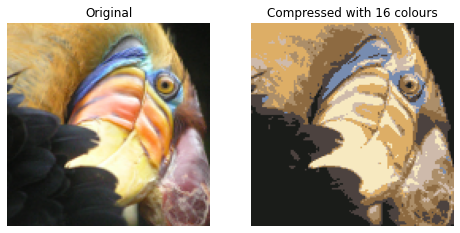

In [37]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')

ax[0].imshow(original_img*255)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered*255)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()